# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress 


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
outputcities = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units ="imperial"

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:

query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(query_url + cities[0]).json()

response

{'coord': {'lon': 155.8, 'lat': 62.53},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 71.02,
  'feels_like': 64.4,
  'temp_min': 71.02,
  'temp_max': 71.02,
  'pressure': 1005,
  'humidity': 38,
  'sea_level': 1005,
  'grnd_level': 946},
 'visibility': 10000,
 'wind': {'speed': 9.33, 'deg': 182},
 'clouds': {'all': 0},
 'dt': 1595804338,
 'sys': {'country': 'RU', 'sunrise': 1595781865, 'sunset': 1595846517},
 'timezone': 39600,
 'id': 2122493,
 'name': 'Omsukchan',
 'cod': 200}

In [5]:
lat = []
lng=[]
temp=[]
maxtemp = []
humidity=[]
cloudiness=[]
windspeed=[]
country=[]
date=[]
newcities=[]

record=1
setcounter=1

# Build partial query URL
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

print ("Beginning Data Retrieval")     
print ("-----------------------------")
for city in cities:
    if record > 50:
        setcounter +=1
        record = 1
    print (f"Processing Record {record} of Set {setcounter} | {city}")
    record +=1
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        maxtemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        newcities.append(city)
        
    except:
        print ("City not found. Skipping...")                        
        pass
    

    

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | omsukchan
Processing Record 2 of Set 1 | kaka
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | nizhniy kuranakh
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | gao
Processing Record 7 of Set 1 | stubbekobing
Processing Record 8 of Set 1 | ternate
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | khatanga
Processing Record 11 of Set 1 | deputatskiy
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | fukue
Processing Record 14 of Set 1 | hambantota
Processing Record 15 of Set 1 | cortez
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | ahuimanu
Processing Record 19 of Set 1 | constitucion
Processing Record 20 of Set 1 | san quintin
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | dikson
Processing

Processing Record 40 of Set 4 | gombong
Processing Record 41 of Set 4 | namatanai
Processing Record 42 of Set 4 | cozumel
Processing Record 43 of Set 4 | sergeyevka
Processing Record 44 of Set 4 | zvishavane
Processing Record 45 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 46 of Set 4 | tabuk
Processing Record 47 of Set 4 | faya
Processing Record 48 of Set 4 | san andres
Processing Record 49 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 50 of Set 4 | wolfen
Processing Record 1 of Set 5 | burnie
Processing Record 2 of Set 5 | norman wells
Processing Record 3 of Set 5 | cape town
Processing Record 4 of Set 5 | arona
Processing Record 5 of Set 5 | lucapa
Processing Record 6 of Set 5 | takoradi
Processing Record 7 of Set 5 | banfora
Processing Record 8 of Set 5 | sao filipe
Processing Record 9 of Set 5 | sapouy
Processing Record 10 of Set 5 | phitsanulok
Processing Record 11 of Set 5 | barawe
City not found. Skipping...
Processing Record 12 of Se

Processing Record 32 of Set 8 | barbar
City not found. Skipping...
Processing Record 33 of Set 8 | ovsyanka
Processing Record 34 of Set 8 | sakaraha
Processing Record 35 of Set 8 | rio grande
Processing Record 36 of Set 8 | lavrentiya
Processing Record 37 of Set 8 | poum
Processing Record 38 of Set 8 | toamasina
Processing Record 39 of Set 8 | navabad
City not found. Skipping...
Processing Record 40 of Set 8 | vanavara
Processing Record 41 of Set 8 | victoria
Processing Record 42 of Set 8 | zapodeni
Processing Record 43 of Set 8 | tongren
Processing Record 44 of Set 8 | aasiaat
Processing Record 45 of Set 8 | mahibadhoo
Processing Record 46 of Set 8 | isangel
Processing Record 47 of Set 8 | thompson
Processing Record 48 of Set 8 | tashara
Processing Record 49 of Set 8 | cascais
Processing Record 50 of Set 8 | jalu
Processing Record 1 of Set 9 | tecoanapa
Processing Record 2 of Set 9 | karratha
Processing Record 3 of Set 9 | tarudant
City not found. Skipping...
Processing Record 4 of Se

Processing Record 14 of Set 12 | tateyama
Processing Record 15 of Set 12 | biloela
Processing Record 16 of Set 12 | el rosario
Processing Record 17 of Set 12 | nagai
Processing Record 18 of Set 12 | andevoranto
City not found. Skipping...
Processing Record 19 of Set 12 | axim
Processing Record 20 of Set 12 | kosa
Processing Record 21 of Set 12 | westport
Processing Record 22 of Set 12 | krasnousolskiy
City not found. Skipping...
Processing Record 23 of Set 12 | kjollefjord
Processing Record 24 of Set 12 | curumani
Processing Record 25 of Set 12 | burriana
Processing Record 26 of Set 12 | durban
Processing Record 27 of Set 12 | akyab
Processing Record 28 of Set 12 | saint peters
Processing Record 29 of Set 12 | broome
Processing Record 30 of Set 12 | allapalli
Processing Record 31 of Set 12 | laem sing
Processing Record 32 of Set 12 | bridlington
Processing Record 33 of Set 12 | charters towers
Processing Record 34 of Set 12 | lolua
City not found. Skipping...
Processing Record 35 of Se

In [6]:

weatherdf=pd.DataFrame({"City":newcities,
              "Latitude":lat,
              'Longitude':lng,
            "Max Temp": maxtemp,
             'Humidity': humidity,
             'Cloudiness': cloudiness,
             "Wind Speed": windspeed,
             "Country": country,
             "Date": date})
weatherdf

City  Latitude  Longitude  Max Temp  Humidity  Cloudiness  \
0           omsukchan     62.53     155.80     71.02        38           0   
1                kaka     37.35      59.61     83.14        23           0   
2    nizhniy kuranakh     58.84     125.49     70.70        71          95   
3             ushuaia    -54.80     -68.30     33.80        86          90   
4                 gao     16.64       1.64     93.34        35          79   
..                ...       ...        ...       ...       ...         ...   
552              tame      6.46     -71.73     74.79        90          85   
553           horsham     51.06      -0.33     62.01        87         100   
554            lobito    -12.35      13.55     69.10        84          34   
555             eskil     38.40      33.41     74.93        29           0   
556            iguape    -24.71     -47.56     65.61        83          88   

     Wind Speed Country        Date  
0          9.33      RU  1595804338  
1          7.83      TM  1595804338  
2          1.83      RU  1595804339  
3         20.80      AR  1595803872  
4          3.89      ML  1595804339  
..          ...     ...         ...  
552        1.68      CO  1595804408  
553        6.93      GB  1595804282  
554        4.81      AO  1595804466  
555        6.78      TR  1595804466  
556        6.67      BR  1595804466  

[557 rows x 9 columns]

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weatherdf.count()

City          557
Latitude      557
Longitude     557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
weatherdf.describe()

Latitude   Longitude    Max Temp    Humidity  Cloudiness  Wind Speed  \
count  557.000000  557.000000  557.000000  557.000000  557.000000  557.000000   
mean    21.865027   17.037074   68.611382   71.633752   50.412926    7.692729   
std     33.430270   90.041673   13.955813   19.986204   38.050871    5.289686   
min    -54.800000 -179.170000   33.800000    8.000000    0.000000    0.160000   
25%     -6.880000  -58.650000   58.190000   63.000000   12.000000    3.530000   
50%     27.980000   19.230000   69.800000   76.000000   53.000000    6.780000   
75%     50.230000   95.320000   78.800000   87.000000   89.000000   10.450000   
max     78.220000  178.420000  104.000000  100.000000  100.000000   34.450000   

               Date  
count  5.570000e+02  
mean   1.595804e+09  
std    2.206106e+02  
min    1.595804e+09  
25%    1.595804e+09  
50%    1.595804e+09  
75%    1.595804e+09  
max    1.595804e+09

In [9]:
#  Get the indices of cities that have humidity over 100%.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [11]:
# Extract relevant fields from the data frame


weatherdf.to_csv("weatherdf", index = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

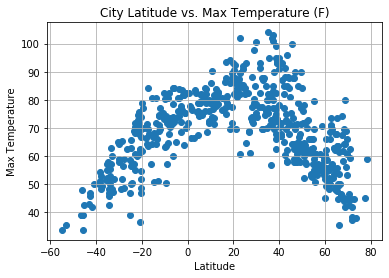

In [12]:
plt.scatter(x=weatherdf['Latitude'], y=weatherdf['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.grid()
plt.title('City Latitude vs. Max Temperature (F)')
plt.savefig('fig1.png')
plt.show()



## Latitude vs. Humidity Plot

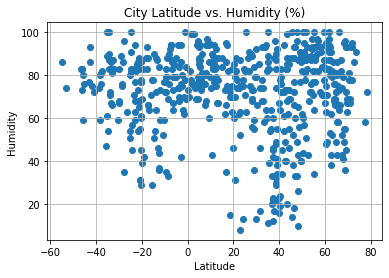

In [13]:
plt.scatter(x=weatherdf['Latitude'], y=weatherdf['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs. Humidity (%)')
plt.grid()
plt.savefig('fig2.png')
plt.show()

## Latitude vs. Cloudiness Plot

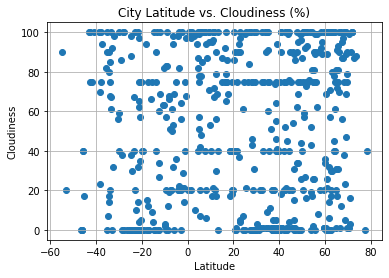

In [14]:
plt.scatter(x=weatherdf['Latitude'], y=weatherdf['Cloudiness'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness (%)')
plt.grid()
plt.savefig('fig3.png')
plt.show()



## Latitude vs. Wind Speed Plot

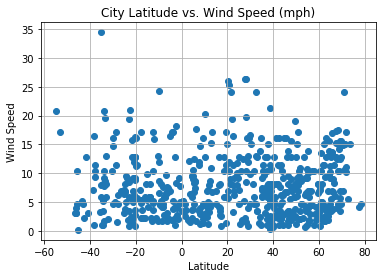

In [15]:
plt.scatter(x=weatherdf['Latitude'], y=weatherdf['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs. Wind Speed (mph)')
plt.grid()
plt.savefig('fig4.png')
plt.show()

## Linear Regression

In [16]:
# OPTIONAL: Create a function to create Linear Regression plots


In [17]:
# Create Northern and Southern Hemisphere DataFrames
nhem = weatherdf.loc[weatherdf["Latitude"] >= 0]
shem = weatherdf.loc[weatherdf["Latitude"] < 0]
nhem
shem

City  Latitude  Longitude  Max Temp  Humidity  Cloudiness  \
3            ushuaia    -54.80     -68.30     33.80        86          90   
7            mataura    -46.19     168.86     39.00        83           0   
10      puerto ayora     -0.74     -90.35     70.00        84          68   
15           rikitea    -23.12    -134.97     70.36        77           0   
17      constitucion    -35.33     -72.42     52.21        89         100   
..               ...       ...        ...       ...       ...         ...   
530  charters towers    -20.10     146.27     61.79        39           0   
532        tchibanga     -2.85      11.03     68.43        86          64   
543          mildura    -34.20     142.15     48.20       100          90   
554           lobito    -12.35      13.55     69.10        84          34   
556           iguape    -24.71     -47.56     65.61        83          88   

     Wind Speed Country        Date  
3         20.80      AR  1595803872  
7          3.00      NZ  1595804340  
10         5.01      EC  1595804030  
15        19.48      PF  1595803915  
17         7.99      CL  1595803947  
..          ...     ...         ...  
530       11.23      AU  1595804460  
532        4.14      GA  1595804460  
543        8.05      AU  1595803998  
554        4.81      AO  1595804466  
556        6.67      BR  1595804466  

[168 rows x 9 columns]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [18]:
def plotreg (x_values, y_values, xtitle, ytitle, textcoords):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,textcoords,fontsize=15,color="red")
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    plt.show()
    print(f"The r-squared is: {rvalue**2}")

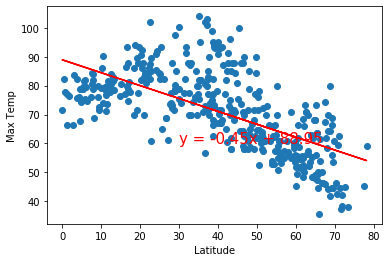

The r-squared is: 0.42181623955174957


<Figure size 432x288 with 0 Axes>

In [19]:

plotreg (nhem['Latitude'], nhem['Max Temp'], 'Latitude','Max Temp', (30,60))

plt.show()
plt.savefig('fig5.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

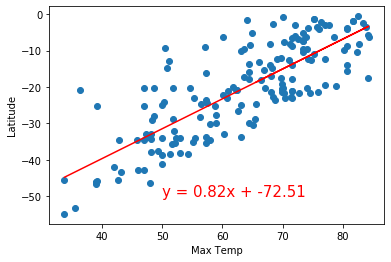

The r-squared is: 0.6435492294352378


<Figure size 432x288 with 0 Axes>

In [20]:

plotreg (shem['Max Temp'], shem['Latitude'], 'Max Temp','Latitude', (50,-50))

plt.show()
plt.savefig('fig6.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [21]:

plotreg (nhem['Humidity'], nhem['Latitude'], 'Humidity','Latitude', (10,10))

plt.show()
plt.savefig('fig7.png')

The r-squared is: 0.0014905603168901328


<Figure size 432x288 with 0 Axes>

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [22]:

plotreg (shem['Humidity'], shem['Latitude'], 'Humidity','Latitude', (50,-50))

plt.show()
plt.savefig('fig8.png')

The r-squared is: 0.005145483484125462


<Figure size 432x288 with 0 Axes>

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [23]:

plotreg (nhem['Cloudiness'], nhem['Latitude'], 'Cloudiness','Latitude', (10,20))

plt.show()
plt.savefig('fig9.png')

The r-squared is: 0.001687210196919984


<Figure size 432x288 with 0 Axes>

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [24]:

plotreg (shem['Cloudiness'], shem['Latitude'], 'Cloudiness','Latitude', (50,-50))

plt.show()
plt.savefig('fig10.png')

The r-squared is: 0.0035612047877106186


<Figure size 432x288 with 0 Axes>

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

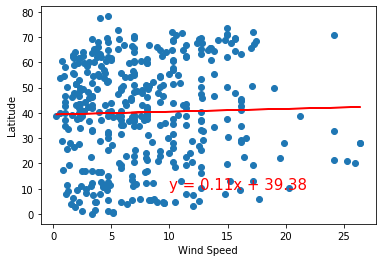

The r-squared is: 0.0008260007131952776


<Figure size 432x288 with 0 Axes>

In [25]:

plotreg (nhem['Wind Speed'], nhem['Latitude'], 'Wind Speed','Latitude', (10,10))

plt.show()
plt.savefig('fig11.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [27]:

plotreg (shem['Wind Speed'], shem['Latitude'], 'Wind Speed','Latitude', (10,-50))

plt.show()
plt.savefig('fig12.png')

The r-squared is: 0.011279099090038354


<Figure size 432x288 with 0 Axes>